# Práctica 1: Aprendizaje automático

__Fecha de entrega: 9 de marzo de 2022__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Apartado 2: Clasificación

__Número de grupo: 10__

__Nombres de los estudiantes: Rubén Gómez, Adrián Pérez y Adrián Sanjuán__

## 1) Carga del conjunto de datos

En este notebook trabajaremos con un conjunto de datos con características de móviles y trataremos de predecir su rango de precio. Las variables del conjunto de datos son las siguientes:

- `battery_power`: Total energy a battery can store in one time measured in mAh
- `blue`: Has bluetooth or not
- `clock_speed`: speed at which microprocessor executes instructions
- `dual_sim`: Has dual sim support or not
- `fc`: Front Camera mega pixels
- `four_g`: Has 4G or not
- `int_memory`: Internal Memory in Gigabytes
- `m_dep`: Mobile Depth in cm
- `mobile_wt`: Weight of mobile phone
- `n_cores`: Number of cores of processor
- `pc`: Primary Camera mega pixels
- `px_height`: Pixel Resolution Height
- `px_width`: Pixel Resolution Width
- `ram`: Random Access Memory in Mega Bytes
- `sc_h`: Screen Height of mobile in cm
- `sc_w`: Screen Width of mobile in cm
- `talk_time`: longest time that a single battery charge will last when you are
- `three_g`: Has 3G or not
- `touch_screen`: Has touch screen or not
- `wifi`: Has wifi or not
- `price_range`: This is the target variable with value of 0 (low cost), 1 (medium cost), 2 (high cost) and 3 (very high cost).

Crea un dataframe a partir del fichero `mobile_phones.csv` que se proporciona junto con la práctica. Como pandas no tiene forma de saber que la variable `price_range` es en realidad categórica, debes indicárselo tú. 

__Nota__: existen otras variables que también son categóricas (como `blue`, `dual_sim`, etc.) pero como sólo pueden tomar dos valores (son booleanas), en nuestro caso no será problamático interpretarlas como números.

In [26]:
import numpy as np
import pandas as pd
RANDOM_STATE=200

In [27]:
df = pd.read_csv("mobile_phones.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica cómo afecta tener o no clases equilibradas a la hora de entrenar y evaluar un modelo.

Calcula la correlación de las variables numéricas con la variable `price_range`. ¿Cuáles tienen mayor correlación con la variable de salida? ¿Qué conclusiones puedes extraer?

Comprueba los rangos y distribuciones de las 4 variables numéricas con mayor correlación con la variable `price_range`. Dibuja el diagrama de dispersión entre cada par de variables asignando un color diferente a los puntos que se corresponden con cada una de las 4 categorías a predecir. ¿Hay pares variables que separen bien las clases? 

A tenor de todo el análisis, ¿crees que va a ser un problema sencillo o complicado de resolver?

In [28]:
pd.set_option("max_rows", 20)
df.groupby('price_range').describe().transpose()

price_range                    0            1            2            3
battery_power count   500.000000   500.000000   500.000000   500.000000
              mean   1116.902000  1228.868000  1228.320000  1379.984000
              std     410.801305   438.614528   452.863065   414.992261
              min     503.000000   501.000000   501.000000   503.000000
              25%     770.500000   843.000000   816.500000  1034.750000
...                          ...          ...          ...          ...
wifi          min       0.000000     0.000000     0.000000     0.000000
              25%       0.000000     0.000000     0.000000     0.000000
              50%       0.000000     1.000000     1.000000     1.000000
              75%       1.000000     1.000000     1.000000     1.000000
              max       1.000000     1.000000     1.000000     1.000000

[160 rows x 4 columns]

Las clases están equilibradas ya que cada una aparece con la misma frecuencia en el dataset. Es importante que las clases estén equilibradas a la hora de entrenar nuestro modelo porque la tasa de aciertos puede presentar problemas en casos de que no lo estén. Esto último es debido a que en un árbol de decisión, en cada nodo u hoja, se tiene en cuenta la cantidad de muestras y su proporción por clases, si desde el principio la proporción de una clase es mayor o menor, se va a ver beneficiada o perjudicada infundadamente a la hora de que nuestro modelo decida.

In [29]:
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)
corr_pr = pd.DataFrame(df.corr()["price_range"])
corr_pr.style.background_gradient(cmap=cm)

,price_range
battery_power,0.200723
blue,0.020573
clock_speed,-0.006606
dual_sim,0.017444
fc,0.021998
four_g,0.014772
int_memory,0.044435
m_dep,0.000853
mobile_wt,-0.030302
n_cores,0.004399


Calculamos el valor absoluto para observar las variables que están muy inversamente relacionadas. Solo nos interesan los nombres de las variables y no el coeficiente, por eso no nos afecta en el resto del problema.

In [30]:
corr_pr_abs = corr_pr.abs()
corr_pr_abs.sort_values(by = 'price_range',ascending = False).style.background_gradient(cmap=cm)

,price_range
price_range,1.000000
ram,0.917046
battery_power,0.200723
px_width,0.165818
px_height,0.148858
int_memory,0.044435
sc_w,0.038711
pc,0.033599
touch_screen,0.030411
mobile_wt,0.030302


La variable más correlacionada con el price_range es la ram con un coeficiente de correlación de 0.917, muy alejado del resto de variables. Se puede extraer de esto que el tamaño de la RAM es la variable que más deberíamos tener en cuenta para determinar el precio del móvil. Esto puede ser debido a que es uno de los componentes más caros del dispositivo y/o de los más determinantes a la hora de ofrecer una mejor experiencia de usuario.

In [31]:
b=corr_pr_abs.sort_values(by = 'price_range',ascending = False)
corr_pr_top5 = b.head(5)
corr_pr_top4 =  corr_pr_top5.tail(4)
df[corr_pr_top4['price_range'].keys()].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ram,2000.0,2124.2130,1084.732044,256.0,1207.50,2146.5,3064.50,3998.0
battery_power,2000.0,1238.5185,439.418206,501.0,851.75,1226.0,1615.25,1998.0
px_width,2000.0,1251.5155,432.199447,500.0,874.75,1247.0,1633.00,1998.0
px_height,2000.0,645.1080,443.780811,0.0,282.75,564.0,947.25,1960.0


Los rangos de las variables variables como battery_power y px_width parecen bastante similares incluso en media. Por otro lado los rangos de la ram que van desde 256 hasta 3998 y de px_height que va desde 0 hasta 1960 son bastante más amplios y diferentes en media que los casos anteriores. En la diagonal de la siguiente matriz podremos analizar mejor las distribuciones de las variables anteriores.

array([[<AxesSubplot:xlabel='price_range', ylabel='price_range'>,
        <AxesSubplot:xlabel='ram', ylabel='price_range'>,
        <AxesSubplot:xlabel='battery_power', ylabel='price_range'>,
        <AxesSubplot:xlabel='px_width', ylabel='price_range'>,
        <AxesSubplot:xlabel='px_height', ylabel='price_range'>],
       [<AxesSubplot:xlabel='price_range', ylabel='ram'>,
        <AxesSubplot:xlabel='ram', ylabel='ram'>,
        <AxesSubplot:xlabel='battery_power', ylabel='ram'>,
        <AxesSubplot:xlabel='px_width', ylabel='ram'>,
        <AxesSubplot:xlabel='px_height', ylabel='ram'>],
       [<AxesSubplot:xlabel='price_range', ylabel='battery_power'>,
        <AxesSubplot:xlabel='ram', ylabel='battery_power'>,
        <AxesSubplot:xlabel='battery_power', ylabel='battery_power'>,
        <AxesSubplot:xlabel='px_width', ylabel='battery_power'>,
        <AxesSubplot:xlabel='px_height', ylabel='battery_power'>],
       [<AxesSubplot:xlabel='price_range', ylabel='px_width'>,
       

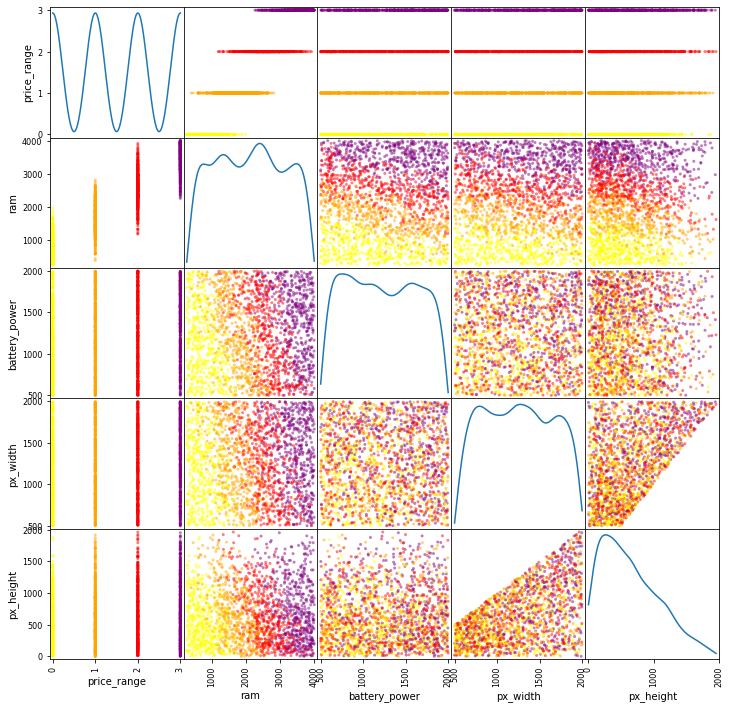

In [32]:
from pandas.plotting import scatter_matrix
%matplotlib inline

dic_colors = { 0: 'yellow', 1: 'orange', 2:'red', 3:'purple'}
colors = df[corr_pr_top5['price_range'].keys()]['price_range'].map(dic_colors)

scatter_matrix(df[corr_pr_top5['price_range'].keys()], figsize = (12, 12), diagonal = 'density', color=colors)

Observando los diagramas de dispersión se puede apreciar que los pares de variables que mejor distinguen entre las 4 clases son los pares que contienen a la variable ram. Esto se debe a la alta correlación entre la variable ram y el price_range. 

Además, podemos observar que no existen móviles por debajo de una relación anchura/altura claramente lineal. Por otro lado las distribuciones de las variables ram, battery_power y px_width son bastante uniformes salvo valores extremos, mientras que la de la variable px_height se concentra en valores en torno a 500 (valores más cercanos al mínimo).

Respecto a la dificultad del problema, parece que va a ser un problema relativamente sencillo de resolver ya que existe una variable muy determinante a la hora de separar por clases debido a su correlación con la variable a predecir.

## 3) Normalizar los datos

Decide razonadamente si es necesario escalar o estandarizar los datos teniendo en cuenta que vamos a construir un árbol de decisión.

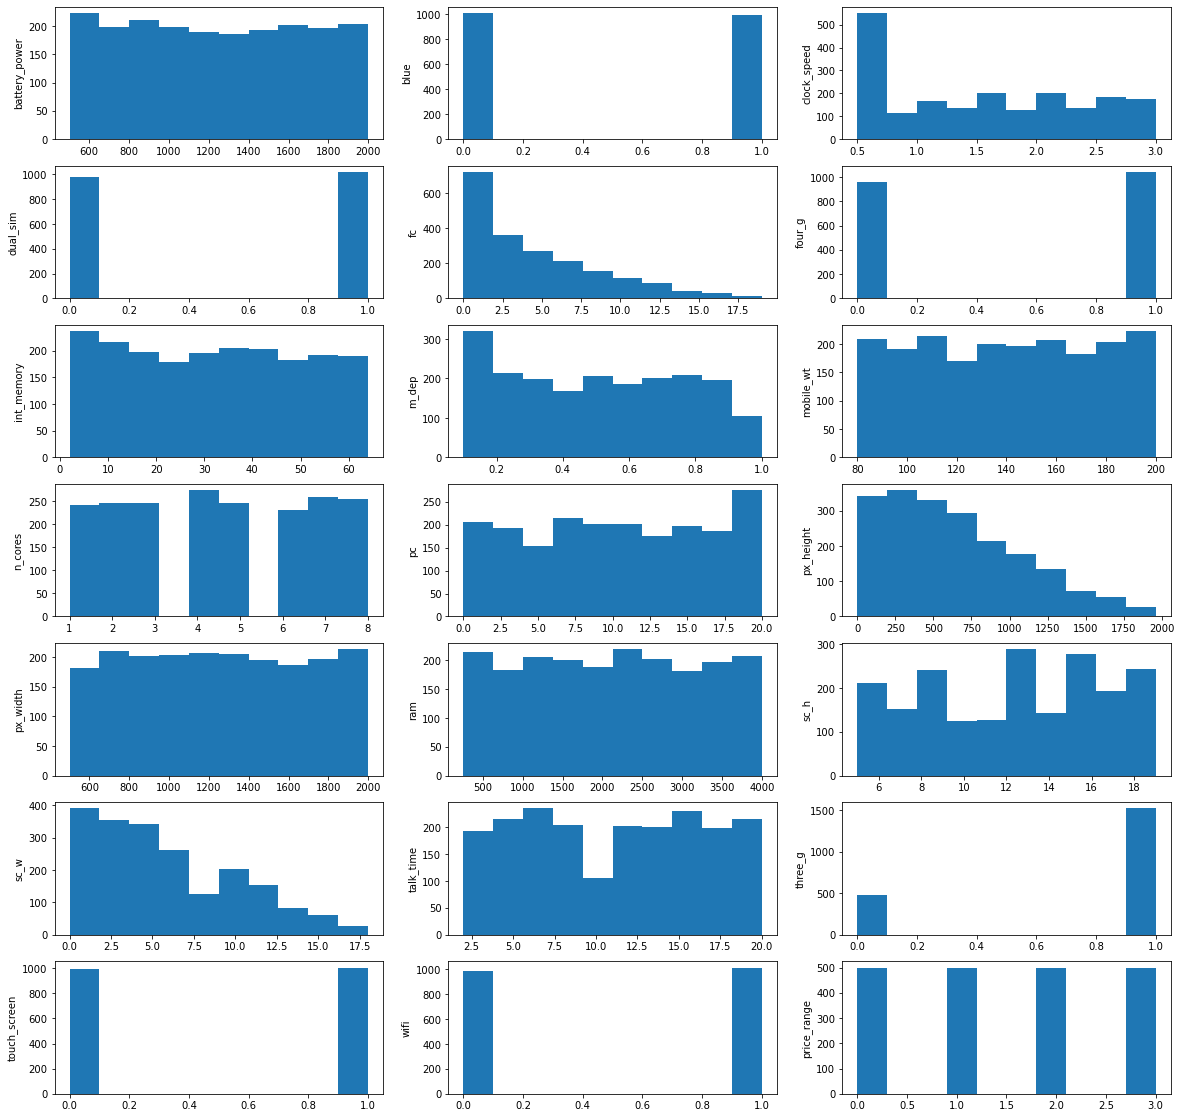

In [33]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20, 20))
for i in range(len(df.columns)):
    p = fig.add_subplot(7, 3, i+1)
    df[df.columns[i]].plot.hist(ax=p)
    p.set_ylabel(df.columns[i])

No necesitamos reescalar los datos ya que el modelo que vamos a entrenar es un árbol de decisión. Lo más importante a la hora de entrenar estos modelos es tener una proporción lo más parecida posible entre las clases de nuestro conjunto de entrenamiento.

## 4) Optimizando el número mínimo de ejemplos para dividir un nodo

En este apartado vamos a entrenar nuestro clasificador e intentar dar con una parametrización que aprenda "lo justo", sin quedarse corto, ni sobreaprender.

Para ello, probaremos distintos árboles variando el número mínimo de ejemplos para dividir un nodo (parámetro `min_samples_split`) y usando validación cruzada en 10 partes. 

Pinta las curvas de apredizaje para distintos valores de dicho parámetro en entrenamiento y validación. Analiza e interpreta las curvas (¿qué puedes decir de cómo varía el comportamiento de clasificador en entrenamiento y validación a medida que cambia el valor del parámetro?) y decide de manera razonada qué valor del parámetro es el que consideras más adecuado.

Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.

Como sklearn trabaja con arrays, deberás acceder al array interno del dataframe. Crea un array que contenga sólo los datos de entrenamiento (sin la variable a predecir) y otro array que sólo contenga la variable a predecir. Usaremos __todas__ las variables del dataset para construir el árbol.

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
features = df.columns[:-1]
classes = ["0 (low cost)", "1 (medium cost)", "2 (high cost)", "3 (very high cost)"]
df_features = df[features]
df_target = df[df.columns[-1]]

In [36]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [37]:
from sklearn.model_selection import cross_validate
train_accuracy = []
test_accuracy = []

# Entrenamos y validamos varios árboles con distintas profundidades máximas
min_sample_splits = range(2,150)
for mss in min_sample_splits: 
    clf = DecisionTreeClassifier(criterion="entropy", min_samples_split=mss, random_state=RANDOM_STATE)
    scores = cross_validate(clf, df_features, df_target, scoring='accuracy', cv=10, return_train_score=True)
    
    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))
    
train_accuracy, test_accuracy

([1.0,
  0.998,
  0.9950555555555555,
  0.990777777777778,
  0.9869999999999999,
  0.9835555555555555,
  0.9795555555555555,
  0.974,
  0.9696111111111112,
  0.9650555555555556,
  0.9608333333333332,
  0.9574444444444445,
  0.9543333333333335,
  0.9513333333333334,
  0.9475555555555555,
  0.9445,
  0.9413333333333334,
  0.9384444444444446,
  0.9367222222222221,
  0.9344444444444443,
  0.9324444444444444,
  0.9295000000000002,
  0.9283888888888889,
  0.9268888888888889,
  0.9252777777777779,
  0.9215,
  0.9204444444444444,
  0.9179444444444445,
  0.9162777777777779,
  0.9152222222222223,
  0.9143333333333334,
  0.913,
  0.9104444444444445,
  0.9088888888888889,
  0.9064444444444444,
  0.9041111111111111,
  0.9027777777777777,
  0.9024444444444445,
  0.9011666666666667,
  0.9001111111111111,
  0.899611111111111,
  0.8989999999999998,
  0.8977222222222222,
  0.8973888888888888,
  0.8966666666666665,
  0.895222222222222,
  0.8948888888888888,
  0.8946111111111111,
  0.8930555555555555,
  0

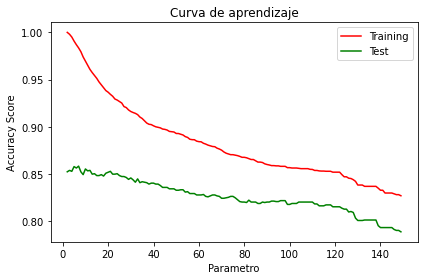

In [38]:
import matplotlib.pyplot as plt

# Draw lines
plt.plot(min_sample_splits, train_accuracy, color="r",  label="Training")
plt.plot(min_sample_splits, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()   

La curva de aprendizaje para el conjunto de entrenamiento comienza con valor 1 (sin errores) para el valor del parámetro min_samples_split = 2 y desciende rápidamente a medida que aumentamos el parámetro. Esto se debe a que si min_samples_split = 2 se generará un árbol con hojas compuestas por una muestra y al evaluar el conjunto de entrenamiento lógicamente va a acertar todas las clases (es decir, nuestro modelo ha sobreaprendido al máximo). A partir de este valor desciende rápidamente porque las hojas empiezan a contener más de una muestra y es posible que haya hojas con muestras de varias clases y al decidir por la mayoritaria cometerá ciertos errores. A partir de min_samples_split = 40 comienza a descender mas despacio hasta min_samples_split = 120 donde observamos otra vez un descenso más acusado.

La curva de aprendizaje para el conjunto de validación da sus valores más altos para min_samples_split relativamente pequeños y desciende levemente hasta min_samples_split = 120 a partir del cual la curva empieza a descender más rápido. 

Que ambas curvas desciendan más rápido a partir de 120 puede deberse a una excesiva generalización a la hora de decidir, se han generado hojas con demasiadas muestras de distintas clases.

Aunque un valor bajo de min_samples_split implique un mayor sobreaprendizaje, hemos decidido elegir min_samples_split = 6 ya que nos da la mayor tasa de aprendizaje en el conjunto de validación. Como se está haciendo validación cruzada en 10 partes consideramos que esta medida es bastante fiable.

## 5) Analizando el árbol de decisión

Crea un nuevo árbol de decisión con el parámetro elegido en el apartado anterior y dibújalo (si es muy profundo dibuja solamente los primeros niveles). 

Obtén también la importancia de las variables, que es una agregación de su poder discriminante en los distintos nodos del árbol donde se usan (más info [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_)) y píntala en una gráfica.

Con esos gráficos, contesta lo siguiente:

- ¿Cuáles son las variables más importantes y en qué orden? 
- ¿Hay variables del conjunto de datos que no se han usado? 
- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 
- ¿El árbol que has calculado es capaz de separar las clases? 
- Si no has mostrado el árbol completo, en la parte que estás viendo, ¿qué clases se separan mejor o peor? ¿qué variables ayudan a discriminarlas?
- ¿En cuál de los nodos del segundo nivel del árbol existe mayor confusión (siendo la raíz el nivel 0)?

__Nota__: al dibujar el árbol con la función `plot_tree` el parámetro `class_names` espera recibir una serie de datos de tipo cadena. Puedes convertir la serie de categorías a una serie de cadenas usando `mi_serie.astype('str')`.

In [39]:
final = DecisionTreeClassifier(criterion="entropy", min_samples_split=6, random_state=RANDOM_STATE)
final = final.fit(df_features, df_target)

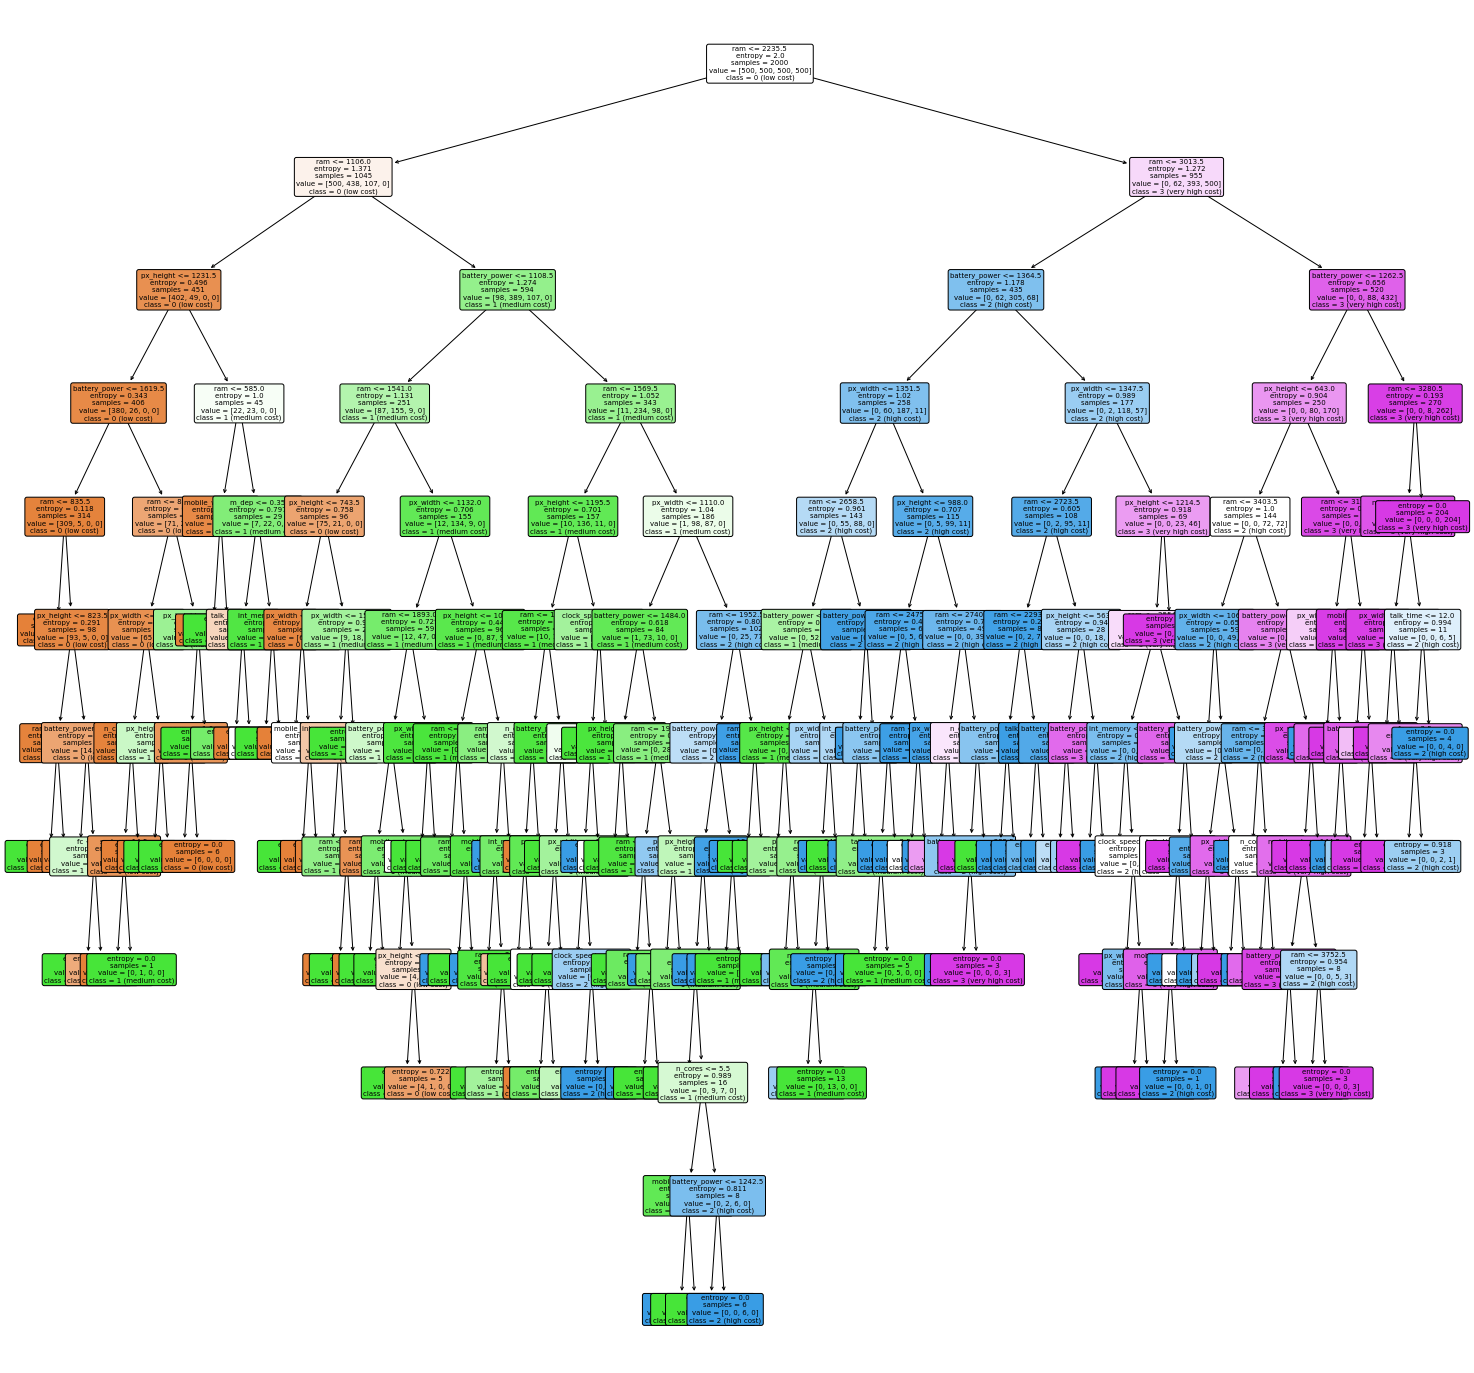

In [40]:
plt.figure(figsize=(25,25))
plot_tree(final, filled=True, feature_names=features, class_names=classes, rounded=True, fontsize=7)
plt.show()

Feature: 0, Score: 0.11639
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00415
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00177
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00774
Feature: 7, Score: 0.00462
Feature: 8, Score: 0.01424
Feature: 9, Score: 0.00645
Feature: 10, Score: 0.00601
Feature: 11, Score: 0.06288
Feature: 12, Score: 0.07922
Feature: 13, Score: 0.68554
Feature: 14, Score: 0.00106
Feature: 15, Score: 0.00302
Feature: 16, Score: 0.00692
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000


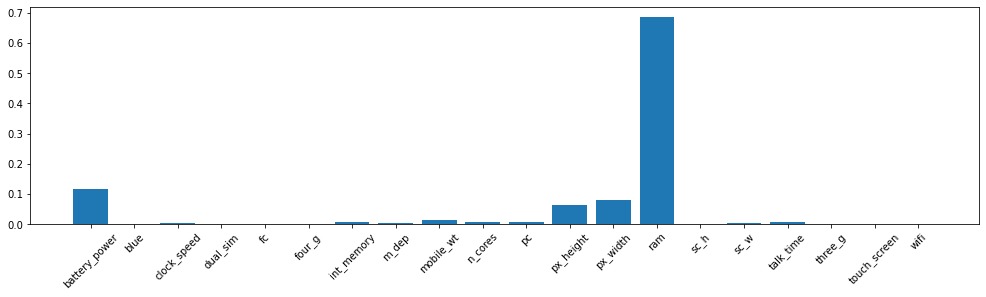

In [41]:
importance = final.feature_importances_
# summarize feature importance

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
fig = plt.figure(figsize = (17, 4))
plt.bar([x for x in range(len(importance))], importance, tick_label = features)
plt.xticks(rotation = 45) 
plt.show()


- ¿Cuáles son las variables más importantes y en qué orden? 

Las variables más importantes son: ram, battery_power, px_width, px_height en ese orden de importancia. Hay que destacar que la ram es considerablemente más importante que lás demás. Como era de esperar hay una clara relación directa entre la correlación de cada variable (en valor absoluto) con la variable objetivo, y la importancia que le da el árbol a estas variables.

- ¿Hay variables del conjunto de datos que no se han usado? 

En la gráfica sobre la importancia podemos observar cuales son las variables que no se han usado en el árbol de decisión porque tienen valor 0, es decir, nuestro modelo considera que estas variables no discriminan adecuadamente a la hora de decidir el price range. Estas variables son: blue, dual_sim, four_g, three_g,touch_screen, wifi. Muchas de estas variables son booleanas y tienen una media al rededor de 0.5 (p.ej. blue, four_g, touch_screen y wifi) lo que significa que más o menos la mitad de los móviles del dataframe tienen la característica y la otra mitad no. De lo anterior deducimos que las diferentes clases del price_range están bastante distribuidas entre las dos mitades ya que estas variables no discriminan nada.


A continuación volvemos a dibujar el árbol mostrando los 3 primeros niveles par apoder observarlo con mayor claridad

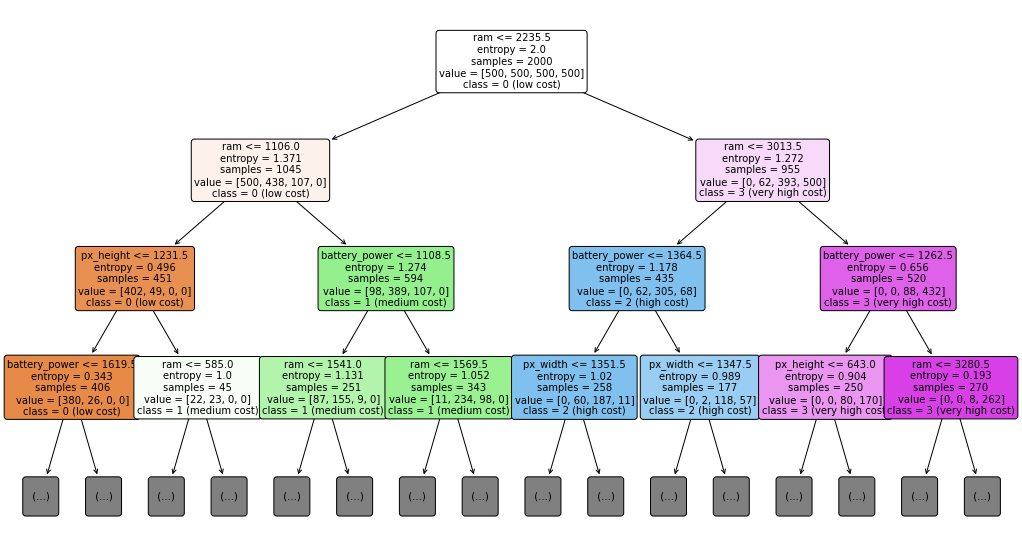

In [42]:
plt.figure(figsize=(18,10))
plot_tree(final, filled=True, feature_names=features, class_names=classes, rounded=True, fontsize=10, max_depth = 3)
plt.show()

- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 

La tasa de acierto tras una pregunta sería de 0.5 (50%). Cuando el árbol se decide por contestar 'low cost', acertará 500 de 1045 mientras que cuando se decide por 'very high cost' acertará 500 veces de 955. En total acertará 1000 veces de 2000, es decir tendrá un _accuracy_ de 0.5.

- ¿El árbol que has calculado es capaz de separar las clases? 

Se ve claramente, que tras dos preguntas el árbol es capaz de separar bastante bien 4 grupos correspondientes a las 4 clases diferentes (_acc_ = 0.76) y posteriormente hace más preguntas para refinar la decisión. En el árbol completo se puede ver que la mayoría de hojas tienen una clase mayoritaria por lo tanto, separa bien las clases.

- Si no has mostrado el árbol completo, en la parte que estás viendo, ¿qué clases se separan mejor o peor? ¿qué variables ayudan a discriminarlas?

En los primeros niveles podemos ver que separa mejor las clases 'low cost' y 'very high cost'. Esto puede ser debido a que al ser clases extremas se pueden confundir solamente con su clase más próxima, mientras que las clases intermedias se pueden confundir con dos clases en lugar de una. La variable más importante a la hora de hacer esta discriminación inicial es ram, seguida de lejos por battery_power y px_height. Estas dos variables, si nos fijamos, no ayudan a reducir la entropía significativamente salvo en algún caso aislado.

- ¿En cuál de los nodos del segundo nivel del árbol existe mayor confusión (siendo la raíz el nivel 0)?

En el segundo nodo del nivel dos (1106 < ram <= 2235.5) es en el que más entropía observamos por lo que es en el que más confusión existe. La mayoría de muestras pertencen a la clase 'medium cost' (389) pero también hay un número considerable de ellas pertenecientes a 'low cost' (98) y 'high cost' (107). 

## 6) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en una empresa real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

In [43]:
# Importamos las métricas que vamos a evaluar para cada una de las clases
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Escribimos las métricas que queremos evaluar
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Calculamos las métricas utilizando validación cruzada
scores = cross_validate(final, df_features, df_target, scoring=scoring_metrics, 
                        cv=10, return_train_score=False)

# Mostrar las métricas agregadas
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.858363222308624
Exhaustividad ponderada media:  0.8565000000000002
F1 ponderado media:  0.856590940822433


Según la precisión observada, el 85.84% de las veces que predice una clase, pertence a esta en clase realmente.

Según la exhaustividad observada, el 85.65% de los miembros de la clase son recuperados por el modelo.

En general, parece un modelo notablemente fiable pero no demasiado exacto. Hemos deducido que al haber solamente 4-5 variables que realmente tienen una importancia alta a la hora de decidir, el modelo tiene pocas opciones de separar una vez ha discriminado por estas variables. Si más de un móvil tuviese estas variables con valores muy similares, sería bastante difícil para nuestro moedelo diferenciarlos.

In [44]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
predictions = cross_val_predict(final, df_features, df_target, cv=10)

# Informe por clases
cr = classification_report(df_target ,predictions, target_names=classes)
print(cr)

                    precision    recall  f1-score   support

      0 (low cost)       0.91      0.91      0.91       500
   1 (medium cost)       0.83      0.83      0.83       500
     2 (high cost)       0.80      0.81      0.81       500
3 (very high cost)       0.89      0.88      0.89       500

          accuracy                           0.86      2000
         macro avg       0.86      0.86      0.86      2000
      weighted avg       0.86      0.86      0.86      2000



In [45]:
# Función extraída de
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[455  45   0   0]
 [ 47 414  39   0]
 [  0  42 405  53]
 [  0   0  61 439]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

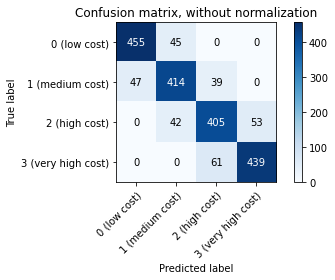

In [46]:
# El parámetro normalize permite mostrar los porcentajes en lugar del número de instancias
plot_confusion_matrix(df_target, predictions, classes, normalize=False)

Normalized confusion matrix
[[0.91  0.09  0.    0.   ]
 [0.094 0.828 0.078 0.   ]
 [0.    0.084 0.81  0.106]
 [0.    0.    0.122 0.878]]


<AxesSubplot:title={'center':'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

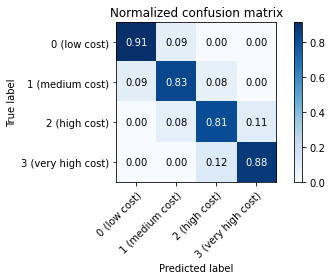

In [47]:
plot_confusion_matrix(df_target, predictions, classes, normalize=True)

En general observamos que la precisión y el recall para las clases 'low cost' y 'very high cost' son altos (valores en torno a 0.9) mientras que estos valores disminuyen para 'medium cost' y para 'high cost' (en torno a 0.8).

Como ya hemos indicado con anterioridad esto puede se debe a que las clases intermedias las confunde con sus dos clases vecinas mientras que las clases extremas solo se confunden con su única clase vecina. De hecho, esto es lo que podemos confirmar con la matriz de confusión anterior.

Consideramos que nuestro modelo puede ofrecer una primera aproximación a una empresa real pero creemos que los valores de precisión y exhaustividad no son lo suficientemente altos como para fiarnos completamente de los resultados. Sin embargo, sí que se tiene certeza de que si el móvil no pertenece a la clase incicada, entonces pertenecerá a alguna de sus clases vecinas.

Ventajas de utilizar un árbol de decisión para este problema:

   - Interpretabilidad: Un modelo basado en un árbol de decisión es bastante interpretable para un experto. En este caso se puede ver claramente cuales han sido las variables más importantes y las decisiones que ha tomado el modelo en cuanto a ellas a la hora de clasificar un dispositivo en un rango de precio. De esta forma, un experto en la materia puede dar sentido no solo a los resultados sino a cómo se ha llegado a ellos.
    
   - Unas pocas preguntas ofrecen una buena primera aproximación de la clasificación. De hecho hemos visto que con apenas dos preguntas sobre la ram obteniamos una _accuracy_ del 0.76.
    
   - No sufre demasiado la dimensionalidad. En nuestro caso tenemos 19 variables y 2000 muestras con las que trabajar pero no afecta demasiado al rendimiento.
    
   - Podemos trabajar tanto con variables categóricas como númericas. En este problema hemos observado que hay varias variables de ambos tipos y no suponen un problema para el algoritmo.
    
   - No requiere un preprocesamiento de los datos, el cual en caso de problemas más grandes puede ser costoso.
    
Desventajas de utilizar un árbol de decisión para este problema:

   - En nuestro caso nos ha salido un árbol bastante profundo, lo que puede llegar a dificultar la interpretabilidad.
    
   - Para este caso las clases estás bien proporcionadas (hay 500 muestras de cada clase) pero con un dataset más desproporcionado nos podría generar un árbol más sesgado.
    
   - Los árboles tienden a ser modelos sobreentrenados. De hecho, esto se puede observar en la curva de aprendizaje de nuestro modelo según min_samples_split para valores bajos de éste. Hemos elegido un valor bajo para min_samples_split, por lo que corremos el riesgo de que nuestro modelo haya sobreaprendido, ya que aunque hayamos basado nuestra elección del parámetro por validación cruzada, el conjunto de datos no es muy grande.
    

## 7) Usando el clasificador k-NN 
Intenta resolver el mismo problema usando un clasificador k-NN. Para ello, elige las variables que consideres más relevantes para el problema, basándote principalmente en el estudio que has hecho del mismo en los apartados anteriores (o alguno adicional que hagas aquí si lo consideras adecuado). Tendrás que decidir, si escalas las variables o no, y qué valor de k consideras el más adecuado.

Analiza los resultados obtenidos y di por qué crees que suceden.


### 7.1 Análisis de datos

Para entrenar al clasificador k-NN vamos a utilizar las cuatro variables mas correlacionadas con la variable de salida (ram, battery_power, px_height y px_width) ya que las demás no sobrepasan, en valor absoluto, 0.1  (no están nada relacionadas con la variable objetivo). Además coincide que estas cuatro variables son numéricas mientras que muchas de las otras son booleanas o categóricas y no nos van a servir para entrenar el clasificador k-NN. Esta decisión la basamos en que el entrenamiento de un modelo k_NN sufre mucho la dimensionalidad, por lo que cuantas menos variables tengamos en cuenta mejor.

Primero estudiaremos la correlacion entre cada par de variables de nuestro dataset reducido (excluiremos la relación con la variable objetico price_range ya que se ha estudiado previamente).

In [48]:
df_new = df[['ram','battery_power','px_height','px_width','price_range']]
features = df_new.columns[:-1]
df_knn = df_new[features]

In [49]:
cm = sns.light_palette("green", as_cmap=True)

df_knn.corr().style.background_gradient(cmap=cm)

,ram,battery_power,px_height,px_width
ram,1.000000,-0.000653,-0.020352,0.004105
battery_power,-0.000653,1.000000,0.014901,-0.008402
px_height,-0.020352,0.014901,1.000000,0.510664
px_width,0.004105,-0.008402,0.510664,1.000000


Como podemos ver, las únicas variables considerablemente relacionadas entre sí son px_height y px_width lo cual tiene sentido ya que ambas están relacionadas con la resolución del dispositivo. Sin embargo no están lo suficientemente relacionadas como para poder prescindir de una de ellas, por lo que nos quedaremos con las 4 para entrenar al clasificador k-NN.

### 7.2 Preprocesamiento de los datos

En el apartado 2 hemos observado que las variables trabajan en rangos diferentes, por lo que se necesitará reescalar o estandarizar las variables. A continuación volvemos a mostrar las distribuciones de estas variables (ya mostradas y analizadas en el apartado 2) para justificar su normalización o reescalado.

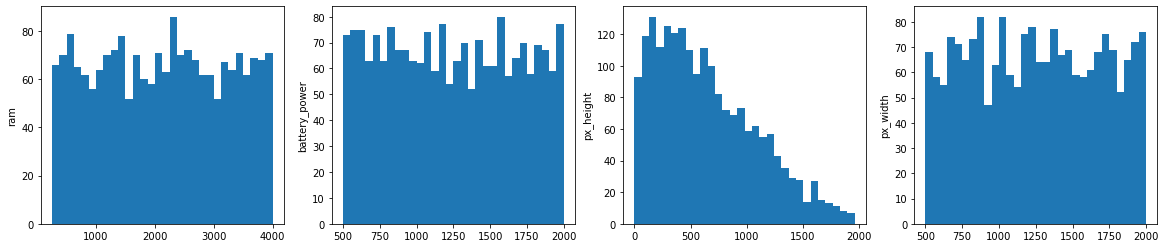

In [50]:
fig = plt.figure(figsize = (20, 4))
for i in range(len(df_knn.columns)):
    p = fig.add_subplot(1, 4, i+1)
    df_knn[df_knn.columns[i]].plot.hist(bins =30, ax=p)
    p.set_ylabel(df_knn.columns[i])

La mayoría de variables tienen una distribución relativamente uniforme de sus valores a lo largo de su rango (excepto px_height), por eso hemos decidido reescalarlas.

In [51]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


scaler = MinMaxScaler()
scaler.fit(df_knn)
scaled =scaler.transform(df_knn)
df_knn_scaled = pd.DataFrame(data = scaled, columns = features)
df_knn_scaled

,ram,battery_power,px_height,px_width
0,0.612774,0.227789,0.010204,0.170895
1,0.634687,0.347361,0.461735,0.993324
2,0.627205,0.041416,0.644388,0.811749
3,0.671566,0.076152,0.620408,0.858478
4,0.308658,0.881764,0.616327,0.475300
...,...,...,...,...
1995,0.110102,0.195725,0.623469,0.927904
1996,0.474613,0.977956,0.466837,0.977971
1997,0.748530,0.941884,0.442857,0.755674
1998,0.163816,0.675351,0.171429,0.113485


### 7.3 Número óptimo de vecinos más cercanos

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [53]:
# Medias y desviaciones típicas de accuracy para distintos valores de k
accuracy_mean = []
accuracy_std = []

k_values = range(1,100)
for k in k_values: 
    # Entrenar y validar
    clf = KNeighborsClassifier(k, weights='distance')
    scores = cross_validate(clf, df_knn, df_target, scoring='accuracy', cv=10)
    
    accuracy_mean.append(np.mean(scores['test_score']))
    accuracy_std.append(np.std(scores['test_score']))

max_value = max(accuracy_mean)
print('Maximum value:', max_value, "for K =", accuracy_mean.index(max_value)+1)

Maximum value: 0.9375 for K = 22


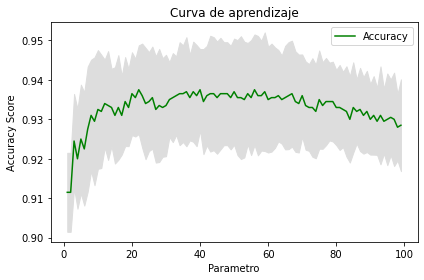

In [54]:
# Dibujamos la línea con la accuracy (exactitud) en el test
plt.plot(k_values, accuracy_mean, color="g", label="Accuracy")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(accuracy_mean) - np.array(accuracy_std)
upper_limit = np.array(accuracy_mean) + np.array(accuracy_std)
plt.fill_between(k_values, lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Según los resultados parece que el número óptimo de vecinos a recuperar para el que vamos a obtener una tasa de aciertos (accuracy) mayor va a ser para k=22 vecinos recuperados. Como estamos haciendo validación cruzada en 10 partes, este resultado podemos considerarlo bastante fiable.

A continuación entrenamos a nuestro clasificador con k = 22.

In [55]:
final_knn = KNeighborsClassifier(n_neighbors=22, weights='distance')
final_knn = final_knn.fit(df_features, df_target)

### 7.4 Análisis de clasificador k-NN final

In [56]:
# Escribimos las métricas que queremos evaluar
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Calculamos las métricas utilizando validación cruzada
scores = cross_validate(final_knn, df_features, df_target, scoring=scoring_metrics, 
                        cv=10, return_train_score=False)

# Mostrar las métricas agregadas
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.9378815064869267
Exhaustividad ponderada media:  0.9369999999999999
F1 ponderado media:  0.9369610392374238


Parece que el clasificador k-NN para una elección de k adecuada funciona mejor que el árbol de decisión. Mientras que con el árbol de decisión obteníamos una precisión ponderada media entorno a 0.86, el clasificador k-NN tiene una precisión ponderada media de 0.938, lo cual es considerablemente mayor. Lo mismo ocurre con el recall, 0.86 con el árbol de decisión y 0.94 para el clasificador k-NN.

Una comparación más general entre clasificadores la podemos obtener utilizando la métrica F1 (cuánto más alta mejor ya que es  una media armónica de la precisión y la exhaustividad): 0.937 (k-NN) > 0.857 (árbol de decisión)

In [57]:
# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
predictions = cross_val_predict(final_knn, df_features, df_target, cv=10)

# Informe por clases
cr = classification_report(df_target ,predictions, target_names=classes)
print(cr)

                    precision    recall  f1-score   support

      0 (low cost)       0.97      0.97      0.97       500
   1 (medium cost)       0.92      0.93      0.92       500
     2 (high cost)       0.91      0.90      0.90       500
3 (very high cost)       0.96      0.94      0.95       500

          accuracy                           0.94      2000
         macro avg       0.94      0.94      0.94      2000
      weighted avg       0.94      0.94      0.94      2000



Normalized confusion matrix
[[0.974 0.026 0.    0.   ]
 [0.034 0.93  0.036 0.   ]
 [0.    0.058 0.902 0.04 ]
 [0.    0.    0.058 0.942]]


<AxesSubplot:title={'center':'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

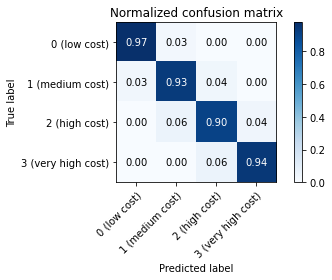

In [58]:
plot_confusion_matrix(df_target, predictions, classes, normalize=True)

Se aprecia una diferencia entre la precisión y el recall obteniendo valores más altos a la hora de predecir clases extremas (en general confundibles con solo una clase como hemos explicado antes) y las clases que representan valores intermedios del rango (en general confundibles con sus dos clases vecinas). Sin embargo, la diferencia a la hora de predecir unas clases y otras no es tan grande como en el árbol de decisión.

Parece que el clasificador k-NN es una mejor elección para tratar este problema ya que hay pocas variables realmente relevantes haciendo que podamos reducir la dimensión en gran medida. Este modelo sería más recomendable que el anterior para el caso de una empresa real ya que no solo ofrece una primera aproximación si no que devuelve resultados bastante fiables.

Ventajas de utilizar un clasificador k-NN para este problema:

   - Simple, no calcula un modelo en sí. Simplmente compara la instancia a predecir con instancias ya etiquetadas.
    
   - En el contexto de nuestro problema parece que clasifica mejor, pero esto es debido a que hemos podido reducir la dimensionalidad. En otro caso, seguramente funcionaría peor que el árbol de decisión.
    
Desventajas de utilizar un clasificador k-NN para este problema:

   - Interpretabilidad: El algoritmo decide a que clase pertenece un dispositivo en función de los vecinos más cercanos, no ofrece un proceso deductivo o inductivo claro que un experto pueda interpretar.
    
   - Dimensionalidad: En el contexto de nuestro problema hemos podido reducir las variables a tener en cuenta ya que pocas de ellas estaban realmente relacionadas con la variable objetivo. En otro contexto en el que encontramos varias variables con un coeficiente de correlación alto con la variable objetivo (y bajo entre sí), el clasificador k-NN no habría sido la mejor opción.
    